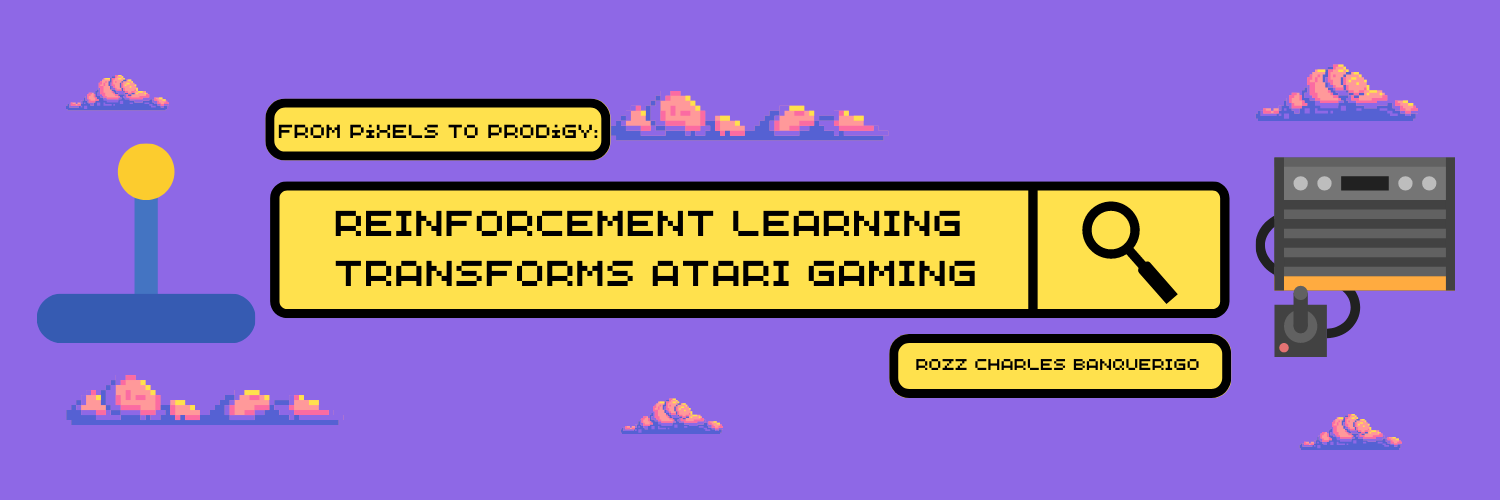

## Why are we doing this?

As a gamer who started playing at the age of **4** and is now **37** (writing this notebook while eagerly awaiting Diablo IV with its questionable AI), I've always been captivated by the potential of enhancing video game enemies through **reinforcement learning (RL)** to create exciting and adaptive challenges. 

Sometimes, boss fights in certain games resemble the captivating and challenging gameplay of **souls-like** titles (developed by [FromSoft](https://www.fromsoftware.jp/ww/)). While not necessarily a bad thing, these games heavily rely on pattern-driven mechanics. However, the true thrill lies in facing opponents who can adapt to your playstyle, making each encounter more demanding. Personally, I easily grow bored if games are too easy.

Also, I have spent thousands of hours playing **MOBA games** and was amazed by the awe-inspiring achievements of AI-powered bots in **Dota 2**, where they triumphed over professional players. This was very interesting to see as I imagined how they did it, and here we should be able to demystify how those bots beat our beloved pro-players. Now, our attention turns to a new frontier as we embark on a journey into the captivating realm of **Atari games**, made possible by the **OpenAI Gym's Gym library**. This exploration provides us with an accessible gateway to delve deeper into the extraordinary capabilities of **reinforcement learning (RL)** in crafting intelligent entities within these iconic games.

RL has emerged as a game-changer in **artificial intelligence**, allowing computer-controlled entities to learn patterns, adapt strategies, and pose formidable challenges to human players. By training AI agents on **Atari games**, researchers have enabled game enemies to learn directly from visual inputs and make intelligent real-time decisions. Exploring the Atari games in OpenAI Gym library allows us to uncover the underlying principles of RL and appreciate how these seemingly simple pixel games serve as powerful tools for understanding and implementing RL algorithms.

In this blog, we will delve into the fascinating world of **reinforcement learning in gaming**, learning the basics of how an AI agent learns, and implementing RL in one of the **Atari games** from OpenAI Gym. Using **Python, PyTorch, and the OpenAI Gym framework**, we will explore the practical aspects of RL, witnessing firsthand how AI agents adapt and improve their gameplay strategies. Get ready for an exciting journey where theory meets practice as we unlock the potential of reinforcement learning in the realm of Atari gaming.

[OpenAI ATARI Gym Libary](https://gymnasium.farama.org/environments/atari/complete_list/)

<div style="display: flex; align-items: left;">
    <img src="" style="display:inline-block; margin-right: 20px;" />
    <img src="assault.gif" style="display:inline-block; margin-right: 10px;" />
    <img src="freeway.gif" style="display:inline-block; margin-right: 10px;" />
    <img src="star_gunner.gif" style="display:inline-block; margin-right: 10px;" />
    <img src="video_pinball.gif" style="display: inline-block; vertical-align: middle;" />
    <img src="journey_escape.gif" style="display: inline-block; vertical-align: middle;" />
</div>

## Before we start some pre-requisites

For you to better appreciate reinforcement learning (RL) in PyTorch, one must grasp key concepts such as **Markov Decision Processes (MDPs)** for representing the environment, **value functions** for estimating expected rewards, **policy optimization** for determining agent behavior, **Deep Q-Networks (DQNs)** for learning from raw sensory inputs, **experience replay** for diverse learning, and utilizing PyTorch's computational capabilities for implementing and training RL models. The **OpenAI Gym library** further enables experimentation in various environments. By combining these elements, one can develop sophisticated RL agents in PyTorch that make intelligent decisions and optimize strategies, bridging the realms of artificial intelligence and decision-making.

You may also want to try implementing this tutorial to achieve a similar feel with a less complex, yet similar approach in reinforcement learning (RL). I also utilized most of the code from this tutorial and further modified it to meet the requirements of ATARI games.
[PyTorch RL Tutorial](https://pytorch.org/tutorials/intermediate/reinforcement_q_learning.html)
[RL Concepts](https://spinningup.openai.com/en/latest/spinningup/rl_intro.html)
[RL Cheatsheet](https://colab.research.google.com/drive/1eN33dPVtdPViiS1njTW_-r-IYCDTFU7N)


However, it is important to note that you do not need to fulfill any additional requirements to run this notebook or replicate it on your own. All you need is an environment that can run Python's Jupyter Notebook and the installation of the required packages. So, if you are ready, let's embark on our pixelized AI journey.

You may also share this repository to anyone interested **Github Repository: [HERE](https://github.com/bossrozz/reinforcement-learning-mspacman)**

## Chosen ATARI Game - Ms. Pacman

Rules: Your goal is to collect all of the pellets on the screen while avoiding the ghosts.

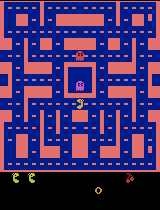

I chose [Ms. Pac-Man](https://gymnasium.farama.org/environments/atari/ms_pacman/) because it is a classic favorite among people born in the 80s and 90s, including myself. Here are a few important points to highlight about the game:

1. **Moderate Complexity**: Ms. Pac-Man has a moderate level of complexity. While the environment has fixed pellet locations, the movements of the ghosts are dynamic in nature. This means that your path will never be fixed, as the AI needs to learn how to dodge the ghosts while collecting all the pellets. Failure to do so will result in a negative reward for each death.

2. **Dynamic Ghost Movements**: The movements of the ghosts in Ms. Pac-Man are not predetermined or scripted. They exhibit dynamic behaviors, adding an additional layer of challenge to the game. The AI agent must adapt and make real-time decisions to effectively avoid the ghosts.

3. **Easier to Learn**: In comparison to other games like [Phoenix](https://gymnasium.farama.org/environments/atari/phoenix/) there are multiple dynamic elements to consider, such as movement, firing of bullets, dodging projectiles, and enemy movement. Ms. Pac-Man is considered easier to learn. It focuses primarily on navigating the maze, avoiding the ghosts, and collecting pellets. The relatively simpler dynamics make it easier for the AI agent to learn and understand the game mechanics.

4. **Faster Training and Improvement**: Due to its moderate complexity and relatively simpler dynamics, Ms. Pac-Man requires fewer training iterations to observe noticeable improvements. This allows us to appreciate the application of reinforcement learning (RL) techniques more quickly as the agent learns and refines its strategies over time.

This would allow us to quickly delve into RL and experience its remarkable improvements.  Alright so let's begin our setup.

### Package Installations

If you have a freshly installed Conda environment, you may need to install all the libraries listed below. Additionally, I encountered some errors and needed to perform two separate installations, which are listed below as they are required by gym.

1. SWIG - https://www.swig.org/Doc1.3/Windows.html
2. Microsoft C++ 14.00 - https://visualstudio.microsoft.com/visual-cpp-build-tools/

    pip install torch
    pip install numpy
    pip install matplotlib
    pip install gymnasium
    pip install gymnasium[box2d]
    pip install autorom[accept-rom-license]
    pip install gym[atari]
    pip install opencv-python
    pip install pyglet==1.2.4

Here's quick overview of each in case you're not familiar.

1. **torch**: PyTorch is a popular open-source machine learning framework primarily used for deep learning tasks. It provides tools for building and training neural networks and RL in this case, as well as handling various data types efficiently.

2. **numpy**: NumPy is a fundamental library for scientific computing in Python. It provides powerful mathematical functions and tools for working with large, multi-dimensional arrays and matrices.

3. **gymnasium**: It seems there may be a typo in the library name you provided. If you meant **OpenAI Gym**, it is a toolkit for developing and comparing reinforcement learning algorithms. It offers a collection of environments and tools for testing and evaluating RL agents.

4. **gymnasium[box2d]**: OpenAI Gym with Box2D is an extension of OpenAI Gym that includes additional environments based on the Box2D physics engine. These environments are particularly suitable for tasks that involve physics simulations.

5. **autorom[accept-rom-license]**: It seems there may be a typo in the library name you provided. Without further context, it's difficult to provide a specific explanation for this library.

6. **gym[atari]**: This is an extension of OpenAI Gym that provides a set of environments specifically designed for Atari 2600 games. It allows you to train RL agents on classic Atari games, facilitating research in deep reinforcement learning.

7. **opencv-python**: OpenCV (Open Source Computer Vision Library) is a popular open-source computer vision library. The "opencv-python" package provides the Python bindings for OpenCV, allowing you to use its functions and tools for various image and video processing tasks.

8. **pyglet==1.2.4**: Pyglet is a cross-platform windowing and multimedia library for Python. The "pyglet==1.2.4" package specifically installs version 1.2.4 of Pyglet, which may be required by certain dependencies or applications.

Please note that the explanations provided are general descriptions of these libraries and their common uses. The specific functionality and features of each library may vary.

### Import All Packages Needed

In [131]:
import gym
import numpy as np
import cv2

import math
import random
import matplotlib
import matplotlib.pyplot as plt
from collections import namedtuple, deque
from itertools import count

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

# set up matplotlib and allow dynamic updates
is_ipython = 'inline' in matplotlib.get_backend()
if is_ipython:
    from IPython import display
plt.ion()

# if GPU is to be used its ok to not have GPU but it takes longer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

### Learning Plot 

We will use this easily visualize the learning curve of our agent and determine if we are making progress.

In [34]:
def plot_scores(episode_scores, show_result=False, title='Scores per Episode'):
    # Create a new figure for the plot
    plt.figure(figsize=(12, 8))

    # Convert the episode_scores list to a PyTorch tensor
    scores_t = torch.tensor(episode_scores, dtype=torch.float)

    if show_result:
        # If show_result is True, set the title of the plot to the provided title
        plt.title(title)
    else:
        # If show_result is False, clear the current figure and set the title to 'Training...'
        plt.clf()
        plt.title('Training...')

    # Set the labels for the x and y axes
    plt.xlabel('Episode')
    plt.ylabel('Scores')

    # Plot the episode scores
    plt.plot(scores_t.numpy())

    # Take 100 episode averages and plot them too
    if len(scores_t) >= 10:
        means = scores_t.unfold(0, 10, 1).mean(1).view(-1)
        means = torch.cat((torch.zeros(10), means))
        plt.plot(means.numpy())

    # Pause a bit to update the plots
    plt.pause(0.001)

    # Check if running in an IPython environment
    if is_ipython:
        if not show_result:
            # If not showing the result, clear the output and display the current figure
            display.clear_output(wait=True)
            display.display(plt.gcf())
        else:
            # If showing the result, display the current figure
            display.display(plt.gcf())


### Setting the Baseline Scores

Now, before we dive into reinforcement learning (RL), let's establish a baseline to measure our performance. In the code below, we have set up the Ms. Pacman game using the latest available version, which is `ALE/MsPacman-v5` from the Atari Gym library. We randomly select actions by sampling over 1000 episodes (games), with each episode having 3 lives.

In [75]:
# Create the Atari Gym environment
#env = gym.make('ALE/MsPacman-v5',  render_mode="human") #use this if you want to see it live in action
env = gym.make('ALE/MsPacman-v5')



# Reset the environment to get the initial state
state, _ = env.reset()
episodes = 1000
episode_scores_rng = []
episode_frame_rng = []

# Loop through the episodes
for i_episode in range(episodes):
    done = False  # Loop until termination based on the environment
    total_frames = 0  # Counter for the number of frames per episode
    total_reward = torch.tensor([0.00], dtype=torch.float32)  # Initial reward at 500 (-100 per life)
    lives = 3  # Reset lives

    while not done:
        if env.render_mode is not None:
            env.render()  # Render the environment

        # Randomly sample an action
        action = env.action_space.sample()

        # Perform the randomized action
        observation, reward, terminated, truncated, info = env.step(action)

        # Check if a life is lost and penalize the reward
        if lives > info.get('lives'):
            lives = info.get('lives')
            reward = torch.tensor([-20.00], dtype=torch.float32)
        total_reward += reward
        total_frames += 1

        done = terminated or truncated
        
        if done:
            # Print episode information and append the total reward to the episode_scores_rng list
            if i_episode == 0 or (i_episode + 1) % 50 == 0:
                print(f'Episode {i_episode + 1} Total Frames: {total_frames} Total Reward: {total_reward[0]}')
            episode_scores_rng.append(total_reward)
            episode_frame_rng.append(total_frames)
            state, _ = env.reset()

env.close()  # Close the environment


Episode 1 Total Frames: 395 Total Reward: 130.0
Episode 50 Total Frames: 417 Total Reward: 180.0
Episode 100 Total Frames: 471 Total Reward: 230.0
Episode 150 Total Frames: 475 Total Reward: 230.0
Episode 200 Total Frames: 541 Total Reward: 180.0
Episode 250 Total Frames: 509 Total Reward: 240.0
Episode 300 Total Frames: 517 Total Reward: 230.0
Episode 350 Total Frames: 449 Total Reward: 140.0
Episode 400 Total Frames: 507 Total Reward: 170.0
Episode 450 Total Frames: 495 Total Reward: 200.0
Episode 500 Total Frames: 489 Total Reward: 140.0
Episode 550 Total Frames: 653 Total Reward: 330.0
Episode 600 Total Frames: 477 Total Reward: 160.0
Episode 650 Total Frames: 513 Total Reward: 130.0
Episode 700 Total Frames: 547 Total Reward: 180.0
Episode 750 Total Frames: 451 Total Reward: 150.0
Episode 800 Total Frames: 431 Total Reward: 70.0
Episode 850 Total Frames: 465 Total Reward: 140.0
Episode 900 Total Frames: 459 Total Reward: 230.0
Episode 950 Total Frames: 585 Total Reward: 370.0
Epis

**Results from sampling the actions**

We can observe from the chart below that the performance for `1000` episodes does not exhibit any discernible growth pattern, indicating that the results are truly random. We will utilize this chart as a basis for comparison once we train our model.

Average Score Randomized: 201.23


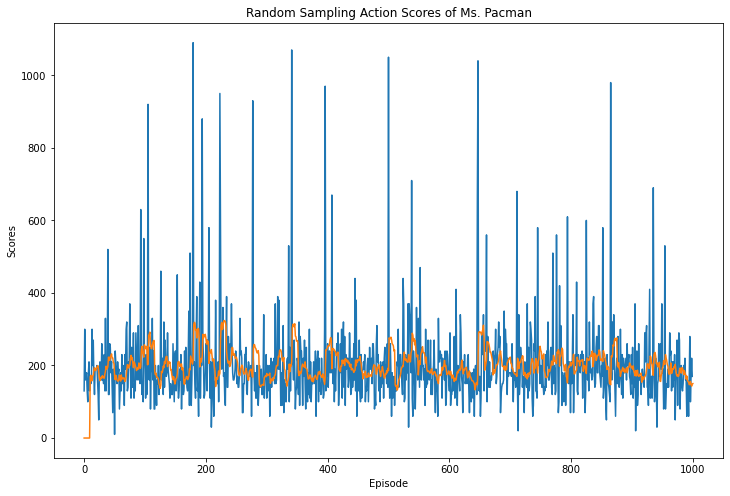

<Figure size 432x288 with 0 Axes>

In [124]:
# Plot and display the scores
print(f'Average Score Randomized: {np.mean([tensor.item() for tensor in episode_scores_rng])}')
plot_scores(episode_scores_rng, title='Random Sampling Action Scores of Ms. Pacman', show_result=True)
%matplotlib inline

## Moving to the Core of our RL Code

Now, let's dive into the exciting part of our discussion. We will be exploring the implementation of the complete RL architecture using the powerful DQN-CNN as our deep learning network. This approach is inspired by research papers that have achieved remarkable success by applying RL to ATARI games. By leveraging the strength of DQN-CNN, we aim to tackle the challenges of learning and mastering complex game environments. Get ready to witness the power of RL in action!

### DQN-CNN Architecture for ATARI Games

By definition, **DQN-CNN**, or Deep Q-Network Convolutional Neural Network, is an architecture that combines **deep reinforcement learning (DQN)** with **convolutional neural networks (CNNs)**.

In the context of **ATARI OpenAI Gym games**, DQN-CNN employs CNN layers to process the **raw pixel inputs** from the game screens.

The architecture utilizes a **deep Q-learning algorithm** to learn the **optimal policy** for playing ATARI games. The **CNN layers** in DQN-CNN extract **meaningful features** from the game screens, enabling the agent to **effectively perceive the game environment**.

These features are then fed into **fully connected layers** to estimate the **Q-values** for different actions. The agent's decision-making is based on these Q-values, and it **improves its policy** through iterative training.

It is important to note that using **4 frames** has been shown to yield the best performance, although this aspect of the architecture is adjustable and not fixed. 

Furthermore, it is a common practice in DQN-CNN to downscale the game screens from the native size of `210x160 pixels` in the OpenAI Gym environment to a size of `84x84 pixels`.

For more information about the architecture, refer to the following papers: .

1. [Scale-invariant temporal history (SITH): optimal slicing of the past in an uncertain world](https://www.researchgate.net/publication/321962850_Scale-invariant_temporal_history_SITH_optimal_slicing_of_the_past_in_an_uncertain_world)
2. [Playing Atari with Deep RL](https://arxiv.org/abs/1312.5602)
3. [DQN Paper](https://storage.googleapis.com/deepmind-media/dqn/DQNNaturePaper.pdf)

In [38]:
class DQN(nn.Module):
    # Using torch.nn to initiate the model
    def __init__(self, input_shape, num_actions):
        super(DQN, self).__init__()
        # Define the convolutional layers
        self.conv1 = nn.Conv2d(input_shape[0], 32, kernel_size=8, stride=4)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=4, stride=2)
        self.conv3 = nn.Conv2d(64, 64, kernel_size=3, stride=1)
        
        # Calculate the output size of the last convolutional layer
        self.fc4 = nn.Linear(self.calculate_conv_output_size(input_shape), 512)
        
        # Define the fully connected layer for outputting Q-values
        self.fc5 = nn.Linear(512, num_actions)

    def forward(self, x):
        # Forward pass through the network with relu activations
      
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = F.relu(self.conv3(x))
        x = F.relu(self.fc4(x.view(x.size(0), -1)))
        x = self.fc5(x)
        return x

    def calculate_conv_output_size(self, input_shape):
        # Calculate the output size of the convolutional layers
        dummy_input = torch.zeros(1, *input_shape)
        output = self.conv3(self.conv2(self.conv1(dummy_input)))
        return output.view(1, -1).size(1)


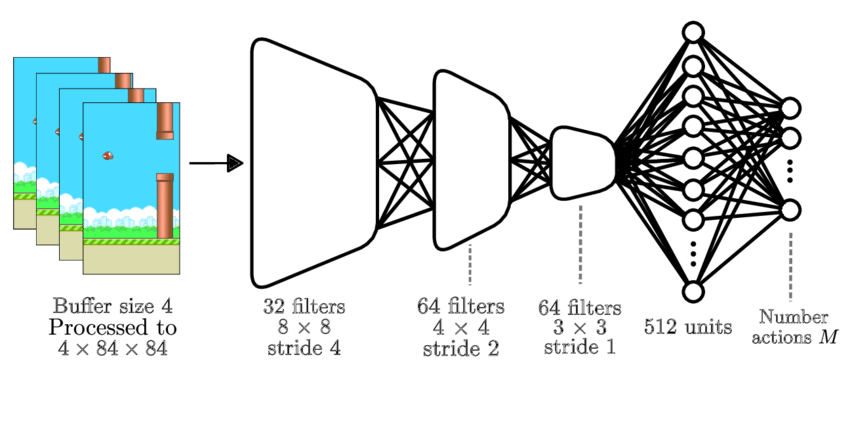

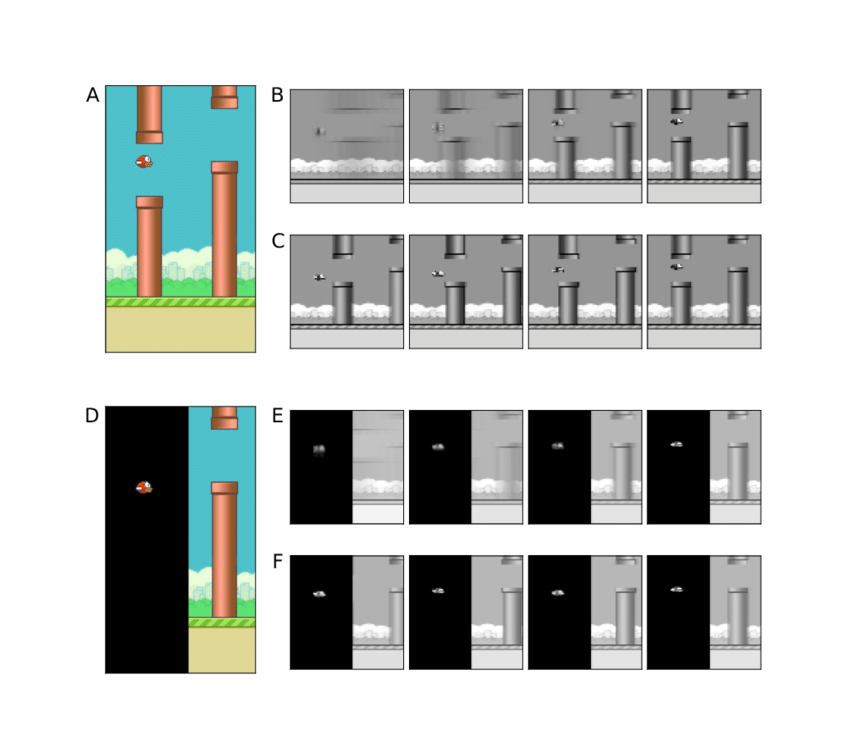

### Replay Memory why do we need it?

Think about it like a person learning to ride a bicycle. **Replay memory** acts as a memory bank where they store their past experiences of riding the bike. Instead of solely relying on the most recent moments, they can recall and learn from various memories scattered throughout their learning journey.

When they want to improve their bike riding skills, they don't just focus on the last few seconds of riding. **Replay memory allows them to randomly select different memories** from their memory bank, which could be moments from different rides, and use them to practice and enhance their abilities. This prevents correlation

By having this diverse set of memories to learn from, the person can avoid getting stuck in a specific pattern or sequence of actions. It **enables them to explore different situations and make better decisions** when encountering new challenges while riding the bike. This approach promotes efficient learning by leveraging a range of experiences and helps the person become a more skilled and adaptable rider.

We will be using the base form of sampling; however, you can further enhance the sampling method by applying prioritized sampling instead of the current uniform sampling. Sampling allows for the breaking of temporal correlations between consecutive experiences, enabling more effective learning in reinforcement learning.

    Transition - a named tuple representing a single transition in our environment. It essentially maps (state, action) pairs to their (next_state, reward) result, with the state being the screen difference image as described later on.

    ReplayMemory - a cyclic buffer of bounded size that holds the transitions observed recently. It also implements a .sample() method for selecting a random batch of transitions for training.

In [39]:
# Define a named tuple to represent a transition in the replay memory
Transition = namedtuple('Transition', ('state', 'action', 'next_state', 'reward'))

class ReplayMemory(object):
    def __init__(self, capacity):
        # Initialize the replay memory with a specified capacity
        self.memory = deque([], maxlen=capacity)

    def push(self, *args):
        """Save a transition into the replay memory"""
        # Append a new transition to the memory using the defined named tuple
        self.memory.append(Transition(*args))

    def sample(self, batch_size):
        """Sample a batch of transitions from the replay memory"""
        # Randomly sample a batch of transitions from the memory
        return random.sample(self.memory, batch_size)

    def __len__(self):
        """Return the current size of the replay memory"""
        return len(self.memory)


### Initialize Global Variables and Models

In [57]:
BATCH_SIZE = 32 # BATCH_SIZE is the number of transitions sampled from the replay buffer
GAMMA = 0.99 # GAMMA is the discount factor to determine future rewards
EPS_START = 0.9 # EPS_START is the starting value of epsilon
EPS_END = 0.05 # EPS_END is the final value of epsilon
EPS_DECAY = 250000 # EPS_DECAY controls the rate of exponential decay of epsilon, higher means a slower decay
TAU = 0.005 # TAU is the update rate of the target network
LR = 1e-4 # LR is the learning rate of the ``AdamW`` optimizer

steps_done = 0 # Count steps in the iteration 
n_actions = env.action_space.n # Get number of actions from gym action space
state, info = env.reset() # Get the number of state observations

INPUT_SHAPE = torch.Size([4, 84, 84]) #Fixed size of 4 frames
OUTPUT = n_actions

# Initiate models
policy_net = DQN(INPUT_SHAPE, OUTPUT).to(device)
target_net = DQN(INPUT_SHAPE, OUTPUT).to(device)
target_net.load_state_dict(policy_net.state_dict())

optimizer = optim.AdamW(policy_net.parameters(), lr=LR, amsgrad=True)
memory = ReplayMemory(20000)

### How do we process the Image?

As noted earlier, we need to resize the image to 84x84 pixels, and this code is responsible for performing the resizing. Additionally, since we are using the RGB version of the game, we also need to convert the image to grayscale to make the model learnn better at lower dimensions.

In [47]:
def preprocess_image(image):
    # Convert the image to grayscale
    grayscale = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    # Downscale the image to a fixed size of 84x84 pixels
    downscaled = cv2.resize(grayscale, (84, 84), interpolation=cv2.INTER_AREA)

    # Return the preprocessed image
    return downscaled


### Selecting the Next Move!

This is my favorite part of the code because it enables the model to learn more effectively using an **Epsilon-Greedy strategy for action selection**.

The **epsilon-greedy strategy** strikes a balance between exploration and exploitation by randomly selecting actions with a certain probability (**epsilon**) and selecting the action with the maximum expected reward (greedy action) otherwise.

In the code, the epsilon value is calculated based on the **decay schedule** (**EPS_START**, **EPS_END**, **EPS_DECAY**) and the number of steps taken (**steps_done**).

If a randomly generated sample is greater than the **epsilon threshold** (**eps_threshold**), the function chooses the **greedy action** by selecting the action with the maximum expected reward from the policy network output.

However, if the sample is less than or equal to the epsilon threshold, the function chooses a **random action** from the environment's action space.

This approach ensures that during the early stages of learning, there is more exploration to discover potentially better actions, while gradually shifting towards exploitation of the learned policy as the epsilon value decays over time.

The earlier set parameters **control** this behavior, and I have personally set a value of `250,000 actions`, as this provided steady growth in learning during my tests. After around `500 episodes`, it starts to pick up, as the threshold for our epsilon algorithm **prioritizes exploitation over exploration**. Later, we will observe the improvements in the trained model through the graph.

In [48]:
def select_action(state):
    global steps_done
    steps_done += 1
    sample = random.random()
    
    # Calculate EPS decay
    eps_threshold = (EPS_END + (EPS_START - EPS_END) * 
                     math.exp(-1. * steps_done / EPS_DECAY))
    
    if sample > eps_threshold:
        with torch.no_grad():
            # t.max(1) will return the largest column value of each row.
            # second column on max result is index of where max element was
            # found, so we pick action with the larger expected reward.
     
            return policy_net(state).max(1)[1].view(1, 1)
    else:
        return torch.tensor([[env.action_space.sample()]], device=device, dtype=torch.long)



### Training and Optimization of Ms. Pacman

This is the heart and soul of our code. We will now commence the training and optimization of our models. Below, you will find an image depicting the high-level functionality of the code, giving you a clear understanding of its operations. Also rather me re-writing all the explanations this article [Reinforcement Learning Explained Visually Deep Q Networks, step-by-step](https://towardsdatascience.com/reinforcement-learning-explained-visually-part-5-deep-q-networks-step-by-step-5a5317197f4b) that is written in plain english can help you understand better.

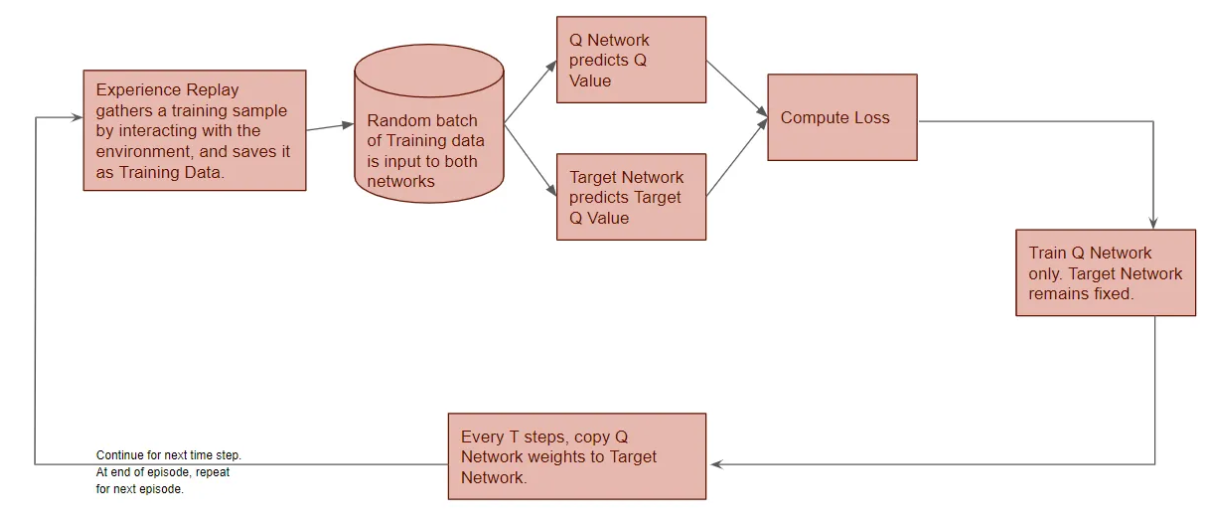

**From coding perspective here's how it translate to each step in the exact code below for better appreciation:**
1. Checks if the replay memory has enough transitions (data) to perform a batch update. If not, the function returns.
2. Samples a batch of transitions from the replay memory.
3. Prepares the batch for computation by transposing the batch and creating masks for non-final states.
4. Computes the state-action values using the policy network and selects the actions that were taken.
5. Computes the values of the next states using the target network and selects the maximum value for each state.
6. Computes the expected state-action values by combining the next state values and the immediate rewards.
7. Calculates the loss using the Huber loss function between the state-action values and the expected values.
8. Performs backpropagation to compute the gradients and updates the model parameters using the optimizer.
9. Applies gradient clipping to prevent the gradients from becoming too large.
10. Performs the optimization step to update the model.

It's a bit overwhelming at this point hopefully you have also read up on this already [REINFORCEMENT LEARNING (DQN) TUTORIAL](https://pytorch.org/tutorials/intermediate/reinforcement_q_learning.html) as it is the same code I utilized for the training along with all the comments.

In [49]:
def optimize_model():
    
    if len(memory) < BATCH_SIZE:
        return
  
    transitions = memory.sample(BATCH_SIZE)
    # Transpose the batch (see https://stackoverflow.com/a/19343/3343043 for
    # detailed explanation). This converts batch-array of Transitions
    # to Transition of batch-arrays.
    batch = Transition(*zip(*transitions))
    
    # Compute a mask of non-final states and concatenate the batch elements
    # (a final state would've been the one after which simulation ended)
    non_final_mask = torch.tensor(tuple(map(lambda s: s is not None,
                                          batch.next_state)), device=device, dtype=torch.bool)

    non_final_next_states = torch.cat([s for s in batch.next_state
                                                if s is not None])
       
    state_batch = torch.cat(batch.state)
    action_batch = torch.cat(batch.action)
    reward_batch = torch.cat(batch.reward)

    # Compute Q(s_t, a) - the model computes Q(s_t), then we select the
    # columns of actions taken. These are the actions which would've been taken
    # for each batch state according to policy_net
    state_action_values = policy_net(state_batch).gather(1, action_batch)

    # Compute V(s_{t+1}) for all next states.
    # Expected values of actions for non_final_next_states are computed based
    # on the "older" target_net; selecting their best reward with max(1)[0].
    # This is merged based on the mask, such that we'll have either the expected
    # state value or 0 in case the state was final.
    next_state_values = torch.zeros(BATCH_SIZE, device=device)

    with torch.no_grad():
        next_state_values[non_final_mask] = target_net(non_final_next_states).max(1)[0]
    # Compute the expected Q values
    expected_state_action_values = (next_state_values * GAMMA) + reward_batch

    # Compute Huber loss
    criterion = nn.SmoothL1Loss()
    loss = criterion(state_action_values, expected_state_action_values.unsqueeze(1))

    # Optimize the model
    optimizer.zero_grad()
    loss.backward()
    
    # In-place gradient clipping
    torch.nn.utils.clip_grad_value_(policy_net.parameters(), 100)
    optimizer.step()
    

**The final block of code in our architecture sets up an environment for the game Ms. Pacman and runs a specified number of episodes. Within each episode, it performs the following steps:**

1. Preprocesses the initial state of the game and initializes an array to store the four frames.
2. Executes the game steps by taking actions, processing observations, and updating the frames array.
3. Handles specific game conditions, such as penalizing spacecraft blowing up.
4. Stores the transition in memory for later optimization.
5. Optimizes the model based on the stored transitions.
6. Performs a soft update of the target network's weights.
7. Keeps track of the total reward and the number of frames in each episode.
8. Prints the progress every 50 episodes.
9. Closes the environment and displays "Complete" at the end.

This code represents the main loop for training the model and collecting data from the game. 

**Congratulations!** you've reached the end of the architecture and you may want to run it now so we can compare it from our baseline! You may want to do something else while we train as this will take hours depending on your GPU or much worse if you only use CPU, you may want to increase or decrease the number of episodes to your liking or machine capability ideally we can see the improvements at 500+ episodes.

In [58]:
# Setting up the environment and parameters
env = gym.make('ALE/MsPacman-v5')
if torch.cuda.is_available():
    num_episodes = 1000
else:
    num_episodes = 10
episode_scores = []
episode_frames = []

# Running the episodes
for i_episode in range(num_episodes):
    # Initialize the environment and get its state
    state, info = env.reset()
    
    # Preprocess the initial state
    processed_state = preprocess_image(state)
    processed_state = torch.tensor(processed_state, dtype=torch.float32, device=device).unsqueeze(0)
    
    # Initialize an array to store the four frames
    frames = [processed_state] * 4
    lives = 3
    total_frames = 0
    total_reward = torch.tensor([0.00], dtype=torch.float32, device=device)
    
    # Running the game steps within an episode
    for t in count():
        # Stack the four frames
        stacked_frames_tensor = torch.stack(frames, dim=0).unsqueeze(0)[0].permute(1, 0, 2, 3)
        
        # Select an action based on the stacked frames
        action = select_action(stacked_frames_tensor)
        
        # Take a step in the environment and process the observation
        observation, reward, terminated, truncated, info = env.step(action.item())
        processed_observation = preprocess_image(observation)
        processed_observation = torch.tensor(processed_observation, dtype=torch.float32, device=device).unsqueeze(0).detach()
        reward = torch.tensor([reward], device=device)
        done = terminated or truncated
        total_frames += 1
        
        # Update the frames array
        if terminated:
            next_state = None
        else:
            frames.pop(0)
            frames.append(processed_observation)
            next_state = torch.stack(frames, dim=0).unsqueeze(0)[0].permute(1, 0, 2, 3)
        
        # Penalize spacecraft blowing up
        if lives > info.get('lives'):
            lives = info.get('lives')
            reward = torch.tensor([-20.00], dtype=torch.float32, device=device)
       
        # Store the transition in memory
        memory.push(stacked_frames_tensor, action, next_state, reward)
        
        # Optimize the model based on the stored transitions
        optimize_model()

        # Soft update of the target network's weights
        target_net_state_dict = target_net.state_dict()
        policy_net_state_dict = policy_net.state_dict()
        for key in policy_net_state_dict:
            target_net_state_dict[key] = policy_net_state_dict[key] * TAU + target_net_state_dict[key] * (1 - TAU)
        target_net.load_state_dict(target_net_state_dict)
        
        total_reward += reward
       
        # Check if the episode is done
        if done:
            #if i_episode == 0 or (i_episode + 1) % 50 == 0:
            print(f'Episode {i_episode + 1} Total Frame: {total_frames} Total Reward: {total_reward[0]}')
            episode_scores.append(total_reward)
            episode_frames.append(total_frames)
            break

env.close()
print('Complete')


Episode 1 Total Frame: 391 Total Reward: 120.0
Episode 2 Total Frame: 547 Total Reward: 230.0
Episode 3 Total Frame: 491 Total Reward: 150.0
Episode 4 Total Frame: 451 Total Reward: 150.0
Episode 5 Total Frame: 485 Total Reward: 150.0
Episode 6 Total Frame: 473 Total Reward: 170.0
Episode 7 Total Frame: 483 Total Reward: 150.0
Episode 8 Total Frame: 487 Total Reward: 180.0
Episode 9 Total Frame: 335 Total Reward: 60.0
Episode 10 Total Frame: 1131 Total Reward: 780.0
Episode 11 Total Frame: 507 Total Reward: 140.0
Episode 12 Total Frame: 497 Total Reward: 230.0
Episode 13 Total Frame: 499 Total Reward: 220.0
Episode 14 Total Frame: 517 Total Reward: 130.0
Episode 15 Total Frame: 445 Total Reward: 140.0
Episode 16 Total Frame: 401 Total Reward: 80.0
Episode 17 Total Frame: 493 Total Reward: 230.0
Episode 18 Total Frame: 519 Total Reward: 240.0
Episode 19 Total Frame: 527 Total Reward: 160.0
Episode 20 Total Frame: 549 Total Reward: 160.0
Episode 21 Total Frame: 457 Total Reward: 160.0
Ep

**Results from our Reinforcment Lerning**

We can clearly see an upward trend, with scores on average increasing. As a reminder, we applied a decaying epsilon-greedy strategy after `250,000` actions (frames), and we can observe the effect on scores halfway through the chart as the average increases. Please note that `1000` episodes is a relatively small number for training, and continuous increase in episodes will further improve our AI.

Average Score RL: 509.99


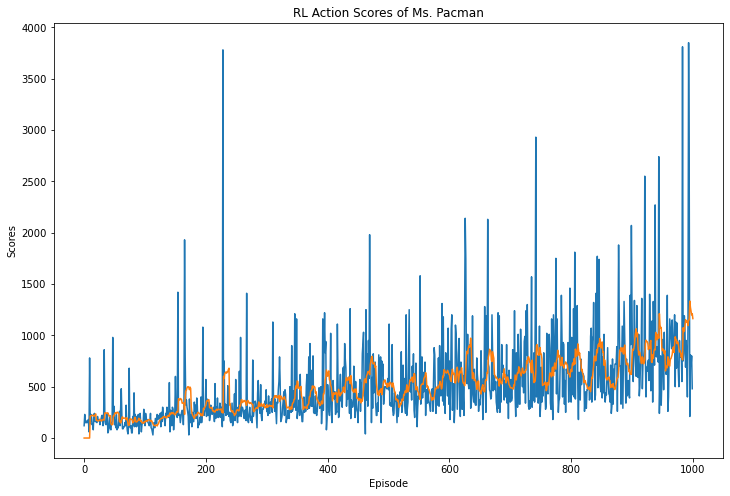

<Figure size 432x288 with 0 Axes>

In [127]:
# Plot and display the scores
print(f'Average Score RL: {np.mean([tensor.item() for tensor in episode_scores])}')
plot_scores(episode_scores, title='RL Action Scores of Ms. Pacman', show_result=True)
%matplotlib inline

### Saving Trained Model and Results 

In [87]:
# Saving best parameters and score results
import pickle

# Save target and policy weights
torch.save(target_net.state_dict(), 'target_weights.pth')
torch.save(policy_net.state_dict(), 'policy_weights.pth')

# Convet tensors to integer
scores_rng = [tensor.item() for tensor in episode_scores_rng]
scores_rl = [tensor.item() for tensor in episode_scores]


# Dump the array into the file using pickle.dump()
pickle.dump(scores_rng, open('scores_rng.pkl', 'wb'))
pickle.dump(scores_rl, open('scores_rl.pkl', 'wb'))
    

In [88]:
# Load results for comparison
scores_rng = pickle.load(open('scores_rng.pkl', 'rb'))
scores_rl = pickle.load(open('scores_rl.pkl', 'rb'))

## Let's now compare the Results 

We can observe the overlay of scores between **Randomized Action** and **Reinforcement Learning**, and it is evident that Randomized Learning remains consistently flat, with performance remaining stagnant throughout the earlier episodes. On the other hand, for Reinforcement Learning, the AI exhibits continuous growth and learning. It is truly remarkable to witness the enhancements taking place from episode 500 onwards. With further episodes dedicated to training, the potential for further improvements becomes even more promising.

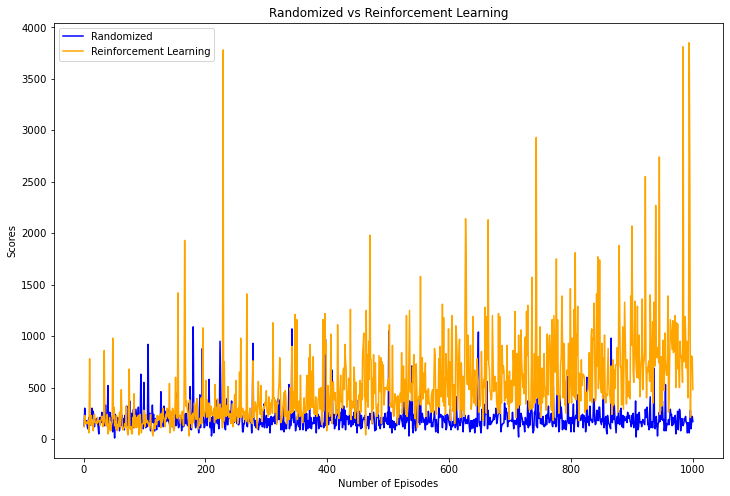

In [115]:
# Plotting
plt.figure(figsize=(12, 8))
plt.plot(np.arange(1, len(scores_rng)+1), scores_rng, label='Randomized', color='blue')
plt.plot(np.arange(1, len(scores_rng)+1), scores_rl, label='Reinforcement Learning', color='orange')

# Customize the plot
plt.xlabel('Number of Episodes')
plt.ylabel('Scores')
plt.title('Randomized vs Reinforcement Learning')
plt.legend()

# Display the plot
plt.show()


In this next chart, we plotted the average every 10 episodes to create a smoother graph. This allows us to observe the curve more clearly and highlight the performance gap achieved by our AI trained with Reinforcement Learning.

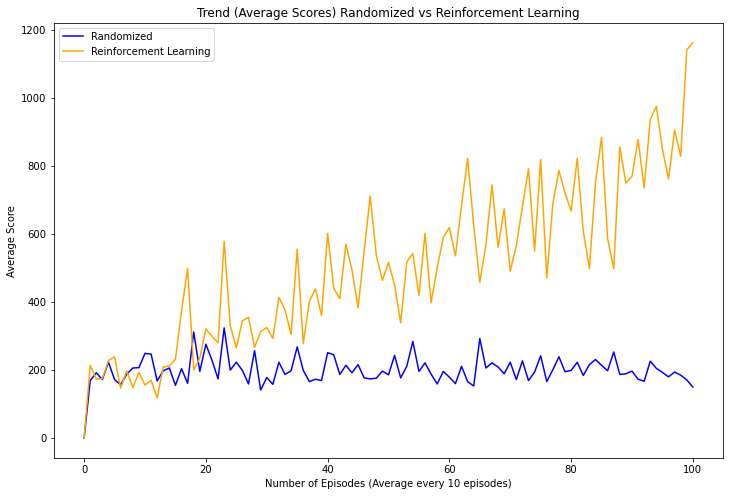

In [111]:
# Sample data
plt.figure(figsize=(12, 8))

# Calculate averages
window_size = 10
averages1 = [0] + [np.mean(scores_rng[i:i+window_size]) for i in range(0, len(scores_rng), window_size)]
averages2 = [0] + [np.mean(scores_rl[i:i+window_size]) for i in range(0, len(scores_rl), window_size)]

# Plotting
plt.plot(range(len(averages1)), averages1, label='Randomized', color='blue')
plt.plot(range(len(averages1)), averages2, label='Reinforcement Learning', color='orange')

# Customize the plot
plt.xlabel('Number of Episodes (Average every 10 episodes)')
plt.ylabel('Average Score')
plt.title('Trend (Average Scores) Randomized vs Reinforcement Learning')
plt.legend()

# Display the plot
plt.show()


Finally, let's examine the distribution of the scores. After `1000` episodes, we can observe that the randomized sample is confined to a smaller range of scores compared to our trained AI. It would be interesting to explore how the distribution evolves after `50,000` or more episodes. Perhaps this is something you can consider trying if you have the time and resources available.

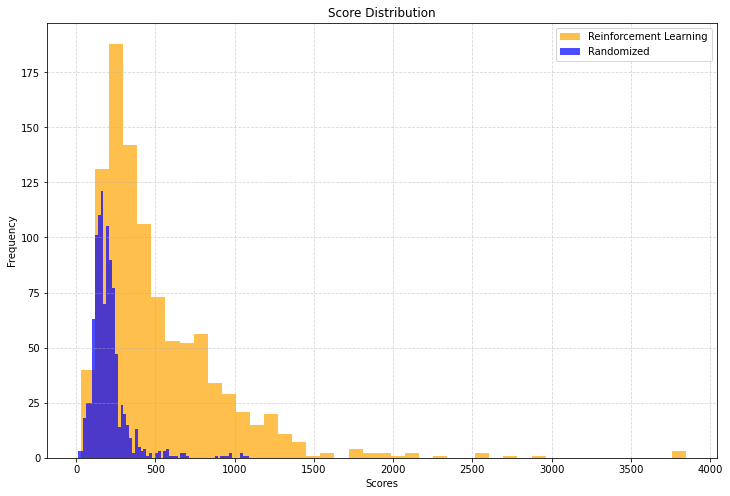

In [116]:
# Create a figure and axis object
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the scores RL distribution 
ax.hist(scores_rl, bins='auto', alpha=0.7, color='orange', label='Reinforcement Learning')

# Plot the scores RNG on top of RL distribution
ax.hist(scores_rng, bins='auto', alpha=0.7, color='blue', label='Randomized')


# Set labels and title
ax.set_xlabel('Scores')
ax.set_ylabel('Frequency')
ax.set_title('Score Distribution')

# Add grid lines
ax.grid(True, linestyle='--', alpha=0.5)

# Add a legend
ax.legend()

# Display the plot
plt.show()


## Let's Now Try Our AI Agent

We will load the trained model of the policy net and initialize it with the same architecture as before. Here, we will observe the consistent performance of the AI. However, since it is not being trained anymore, its scores will generally fall within a certain range.

In [129]:
# Create the Atari Gym environment
# env = gym.make('ALE/MsPacman-v5', render_mode="human")
env = gym.make('ALE/MsPacman-v5')

# Reset the environment to get the initial state
state, _ = env.reset()
episodes = 100
episode_scores_play = []

# Initiate DQN Model
ai_agent = DQN(INPUT_SHAPE, OUTPUT).to(device)

# Load the trained weights
weights_path = 'policy_weights.pth'
ai_agent.load_state_dict(torch.load(weights_path))

for i_episode in range(episodes):

    done = False  # Loop until termination based on the environment
    total_frames = 0  # Counter for the number of frames per episode
    total_reward = torch.tensor([0.00], dtype=torch.float32)  # Initial reward at 500 (-100 per life)
    lives = 5  # Reset lives
    
    # Preprocess the initial state
    processed_state = preprocess_image(state)
    processed_state = torch.tensor(processed_state, dtype=torch.float32, device=device).unsqueeze(0)
    
    # Initialize an array to store the four frames
    frames = [processed_state] * 4
    lives = 3
    total_frames = 0
    total_reward = torch.tensor([0.00], dtype=torch.float32, device=device)
    
    while not done:
        if env.render_mode is not None:
            env.render()

        stacked_frames_tensor = torch.stack(frames, dim=0).unsqueeze(0)[0].permute(1, 0, 2, 3)
        
        # Select an action based on the stacked frames
        action = ai_agent(stacked_frames_tensor).max(1)[1].view(1, 1)
        
        # Take a step in the environment and process the observation
        observation, reward, terminated, truncated, info = env.step(action.item())
        
        processed_observation = preprocess_image(observation)
        processed_observation = torch.tensor(processed_observation, dtype=torch.float32, device=device).unsqueeze(0).detach()
        reward = torch.tensor([reward], device=device)
        done = terminated or truncated
        total_frames += 1
        
        
        if terminated:
            next_state = None
        else:
            #Update next sequence of the frame
            frames.pop(0)
            frames.append(processed_observation)
        
        if lives > info.get('lives'):
            lives = info.get('lives')
            reward = torch.tensor([-20.00], dtype=torch.float32, device=device)
       
        total_reward += reward

        if done:
            #if i_episode == 0 or (i_episode+1) % 10 == 0:
            print(f'Episode {i_episode + 1} Total Frames: {total_frames} Total Reward: {total_reward[0]}')
            episode_scores_play.append(total_reward)
            state, _ = env.reset()

env.close()


Episode 1 Total Frames: 795 Total Reward: 740.0
Episode 2 Total Frames: 729 Total Reward: 540.0
Episode 3 Total Frames: 581 Total Reward: 380.0
Episode 4 Total Frames: 673 Total Reward: 550.0
Episode 5 Total Frames: 1175 Total Reward: 1530.0
Episode 6 Total Frames: 677 Total Reward: 580.0
Episode 7 Total Frames: 1007 Total Reward: 730.0
Episode 8 Total Frames: 1043 Total Reward: 830.0
Episode 9 Total Frames: 673 Total Reward: 550.0
Episode 10 Total Frames: 721 Total Reward: 590.0
Episode 11 Total Frames: 615 Total Reward: 540.0
Episode 12 Total Frames: 603 Total Reward: 460.0
Episode 13 Total Frames: 745 Total Reward: 620.0
Episode 14 Total Frames: 609 Total Reward: 540.0
Episode 15 Total Frames: 613 Total Reward: 550.0
Episode 16 Total Frames: 673 Total Reward: 550.0
Episode 17 Total Frames: 673 Total Reward: 550.0
Episode 18 Total Frames: 701 Total Reward: 790.0
Episode 19 Total Frames: 673 Total Reward: 550.0
Episode 20 Total Frames: 881 Total Reward: 720.0
Episode 21 Total Frames: 

### Final Result

We can observe the consistent performance of the AI agent over `100` episodes, confirming that our agent has genuinely learned from the training. The average score surpasses the randomized approach's score of `200`, as discussed in the earlier part of this blog. By loading the weights obtained from training, we have successfully built an AI agent using Reinforcement Learning. You can now explore this approach with other games available in the OpenAI ATARI Gym library. While it should work based on my testing, you may need to make some adjustments depending on the game's specific rules, such as the number of lives available per episode and the desired reward settings.

Average Score: 665.5


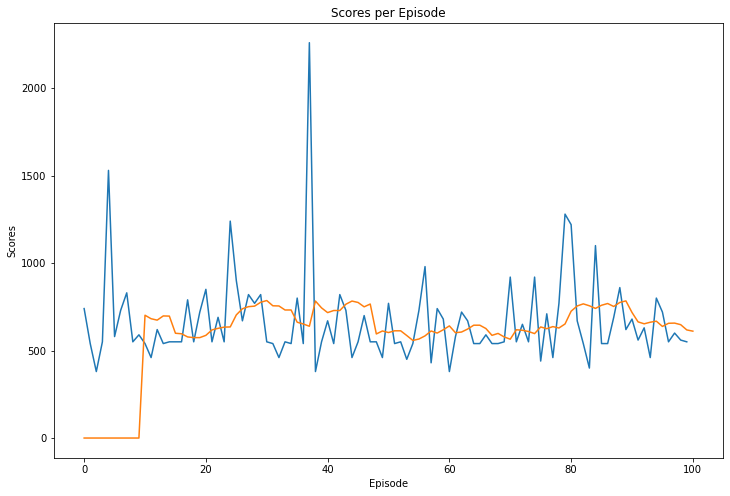

<Figure size 432x288 with 0 Axes>

In [130]:
print(f'Average Score: {np.mean([tensor.item() for tensor in episode_scores_play])}')
plot_scores(episode_scores_play, show_result=True)
%matplotlib inline

## AI in Action

I've captured both the **randomized** and **AI Agent** gameplays for your viewing pleasure. In the randomized gameplay, the player moves without any particular strategy and often falls victim to the ghosts at random. However, our trained **AI Agent**, utilizing the same model as mentioned earlier, has developed a keen focus on the **bottom portion of the map, especially the bottom right area**. (Please note that there is no audio in the video; it is solely meant for a complete visual viewing experience.)

It's worth noting that the AI Agent sometimes encounters moments of being stuck, opting to remain stationary instead of actively **maximizing rewards**. Perhaps the model has yet to discover or learn about the presence of pellets scattered across the **majority of the top portion** of the map. Nevertheless, we can observe a **distinct behavior** exhibited by the AI Agent, and it's fascinating to witness its occasional successful **dodges of the ghosts**.

Now, prepare yourself for an engaging showcase of both the unpredictable chaos of a random moveset and the calculated maneuvers of our AI Agent as they navigate the maze of Ms. Pac-Man!

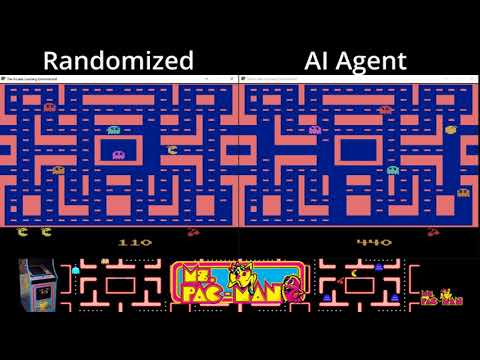

In [7]:
from IPython.display import YouTubeVideo
video_id = "fbXC0mjWoDo"
video = YouTubeVideo(video_id, width=720, height=480)
display(video)

[Click here to watch the YouTube video](https://www.youtube.com/watch?v=fbXC0mjWoDo)

## Closing Thoughts

We may not have developed a cutting-edge AI capable of playing next-gen games or a **prodigy** defeating professional gamers, nor can we guarantee that your next **boss fight** will be more nerve-wracking than the previous one. However, we have successfully **demonstrated the power of Reinforcement Learning** in training an AI agent and enabling it to **adapt and learn from its environment**.

Before delving into this topic, I, too, held the misconception that game AI relied solely on pre-programmed move lists and possessed prior knowledge of all possible outcomes. It seemed **impossible to code such an AI**, given the immense number of combinations in dynamically changing game environments. However, my exploration has revealed the truth: the AI **learns and improves over time**, especially when faced with more challenging opponents or complex environments.

Just like human players, the AI becomes more proficient by **acting and making decisions more swiftly**. The effectiveness of our AI agent heavily depends on how well we **train it using Reinforcement Learning techniques**. So, while we may not have all the flashy advancements or prodigies, we have discovered a remarkable approach to enhancing game AI.

I've delved into experimenting with other more complex ATARI games in the gym library, such as Phoenix, and the results were quite intriguing. Interestingly, using a similar model didn't yield the same outcome. Most of these games demanded more training, and `1000` episodes were simply not enough to witness significant learning gains.

If you're passionate about improving this RL model, there's a plethora of alternative architectures to explore beyond **DQN**. Consider the likes of **Double DQN, Dueling DQN, Prioritized Experience Replay, and Rainbow DQN**, among others. These architectures offer unique enhancements designed to tackle specific challenges in reinforcement learning. Moreover, you can delve into techniques like striking the right balance between exploration and exploitation, determining the optimal number of training episodes, increasing frame size, and fine-tuning other hyperparameters. It's worth noting that more complex games within the ATARI library, with their intricate environments, may necessitate a different approach. Extensive experimentation is crucial to achieving the desired results.